In [1]:
#Import packages
from pandas import read_csv
import sklearn
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LinearRegression
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
#Load dataset
dataframe = read_csv("Desktop/newweather.csv").set_index('Date')
dataset = dataframe.values
print(dataset)

[[82.  75.   nan ... 30.  29.9  0.1]
 [84.  76.1 75.  ... 30.  29.9  0.1]
 [86.  76.  76.1 ... 30.  29.9  0.1]
 ...
 [88.  79.1 79.7 ... 29.9 29.8  0. ]
 [88.  80.3 79.1 ... 29.9 29.8  0. ]
 [88.  80.  80.3 ... 29.9 29.8  0. ]]


In [3]:
feature='Avgtemp'

#correlation
dataframe.corr(method='pearson')[['Avgtemp']].sort_values('Avgtemp')

,Avgtemp
Maxpre,-0.801171
Avgpre,-0.748189
Maxhum,-0.700610
Avghum,-0.659254
Minhum,-0.587137
Precep,-0.068783
Minpre,-0.060489
Maxws,0.236944
Mindewp,0.281417
Avgdewp,0.600945


In [4]:
#select prediction features
predictors=['Minws','Maxdewp','Avgws','Avgtemp1','Avgtemp2']

#remove first two rows since they contain NULL value
df2 = dataframe[['Avgtemp'] + predictors]
df2.index[0]
df1=df2.drop(df2.index[0])
df1.index[0]
df1=df1.drop(df1.index[0])
df1

,Avgtemp,Minws,Maxdewp,Avgws,Avgtemp1,Avgtemp2
Date,,,,,,
2019-01-03,76.0,0,68,5.8,76.1,75.0
2019-01-04,76.5,0,72,5.8,76.0,76.1
2019-01-05,76.5,0,70,4.8,76.5,76.0
2019-01-06,77.0,0,70,4.4,76.5,76.5
2019-01-07,76.8,0,70,4.8,77.0,76.5
...,...,...,...,...,...,...
2020-02-16,79.6,0,68,5.6,79.9,80.1
2020-02-17,79.7,0,68,4.8,79.6,79.9
2020-02-18,79.1,0,68,4.5,79.7,79.6


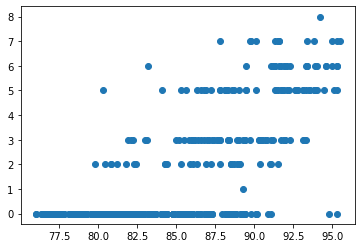

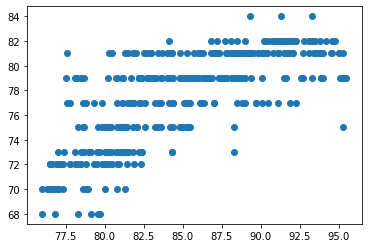

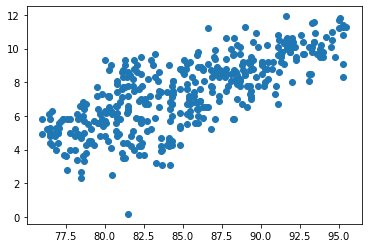

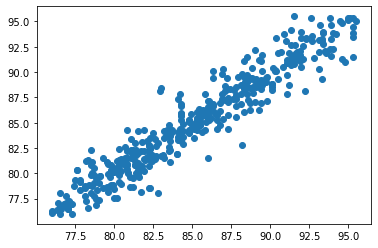

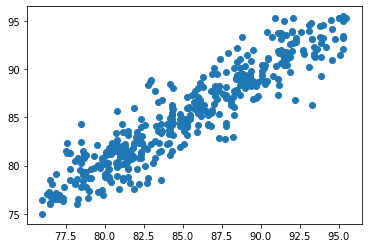

In [5]:
#scatterplot
plt.scatter(df1['Avgtemp'],df1['Minws'])
plt.show()
plt.scatter(df1['Avgtemp'],df1['Maxdewp'])
plt.show()
plt.scatter(df1['Avgtemp'],df1['Avgws'])
plt.show()
plt.scatter(df1['Avgtemp'],df1['Avgtemp1'])
plt.show()
plt.scatter(df1['Avgtemp'],df1['Avgtemp2'])
plt.show()

In [6]:
#train and test set
X=df1[predictors]
y=df1['Avgtemp']

# construct the training and testing split by taking 75% of the data for training and 25% for testing
(trainData, testData, trainLabels, testLabels) = train_test_split(X, y, test_size=0.25, random_state=42)

In [7]:
#linear regression model
regressor=LinearRegression()
regressor.fit(trainData,trainLabels)
prediction=regressor.predict(testData)

In [8]:
#accuracy score
acc=regressor.score(testData,testLabels)
acc

0.9472110976724653